In [1]:
#Import the data.
#Import the required libraries

import pandas as pd
import os.path as osp
import statsmodels.api as sm
from statsmodels.formula.api import ols

data_path = osp.join(osp.curdir,'byYEAR,hood.csv')
data = pd.read_csv(data_path)
data

,Number_Of_Crime,OCC_YEAR,Neighbourhood_Name,Neighbourhood_Number,Total_Age_groups_of_the_population,Married_CommonLaw_Rate,Education_Rate,Employment_rate,Average_age,Average_total_income_in_2020
0,218,2019,Milliken,130,23980,48.519600,20.454545,41.5,44.9,36800
1,100,2019,Woburn North,142,26580,44.018059,29.063205,50.5,40.1,40000
2,69,2019,Forest Hill North,102,12290,44.995932,44.304312,60.5,42.3,89700
3,168,2019,Oakdale-Beverley Heights,154,21420,38.608777,12.675070,50.8,39.8,41160
4,79,2019,Rockcliffe-Smythe,111,22235,40.746571,15.988307,48.8,42.2,43840
...,...,...,...,...,...,...,...,...,...,...
785,49,2023,North Toronto,173,15885,42.052251,54.548316,65.0,39.2,58100
786,38,2023,Broadview North,57,10955,41.853035,32.496577,56.1,42.6,54050
787,37,2023,Old East York,58,9160,47.379913,31.168122,56.3,43.0,63800
788,63,2023,South Eglinton-Davisville,174,22735,44.336925,58.324170,65.6,40.1,69000


In [2]:
#Build our model using statsmodels
model = ols('Number_Of_Crime ~ OCC_YEAR + Total_Age_groups_of_the_population + Married_CommonLaw_Rate + Education_Rate + Employment_rate + Average_age + Average_total_income_in_2020',data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Crime   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     50.88
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           9.41e-60
Time:                        22:32:02   Log-Likelihood:                -4421.9
No. Observations:                 790   AIC:                             8860.
Df Residuals:                     782   BIC:                             8897.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [3]:
# R-squqared: 0.313
# P value for F-test: 9.41e-60 - model is siginificant
# p value for T test:

# OCC_YEAR: 0.000
# Total_Age_groups_of_the_population: 0.000     
# Married_CommonLaw_Rate:  0.000
# Education_Rate: 0.004
# Employment_rate: 0.014         
# Average_age: 0.164
# Average_total_income_in_2020: 0.000

# average age insignificant


# final model after dropping variable

In [4]:
#new model
tot_crime_model = ols('Number_Of_Crime ~ OCC_YEAR + Total_Age_groups_of_the_population + Married_CommonLaw_Rate + Education_Rate + Employment_rate + Average_total_income_in_2020',data).fit()
print(tot_crime_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Crime   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     58.97
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           3.05e-60
Time:                        22:32:02   Log-Likelihood:                -4422.9
No. Observations:                 790   AIC:                             8860.
Df Residuals:                     783   BIC:                             8892.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [5]:
# R-squqared: 0.311
# P value for F-test: 3.05e-60 - model is siginificant
# p value for T test:

# OCC_YEAR: 0.00
# Total_Age_groups_of_the_population: 0.000     
# Married_CommonLaw_Rate:  0.001
# Education_Rate: 0.005
# Employment Rate: 0.043
# Average_total_income_in_2020: 0.000

# All variables siginificant and explains Number of Crimes


'''
This is final model
'''

'\nThis is final model\n'

# Graph/plots

In [6]:
#Import the required package from sklearn
from sklearn.linear_model import LinearRegression

train_X = data[['OCC_YEAR','Total_Age_groups_of_the_population','Married_CommonLaw_Rate','Education_Rate','Employment_rate','Average_total_income_in_2020']].values
train_y = data['Number_Of_Crime'].values


# Fitting data to a regression model requires 

reg = LinearRegression().fit(train_X, train_y)

### Residual vs Fitted value 

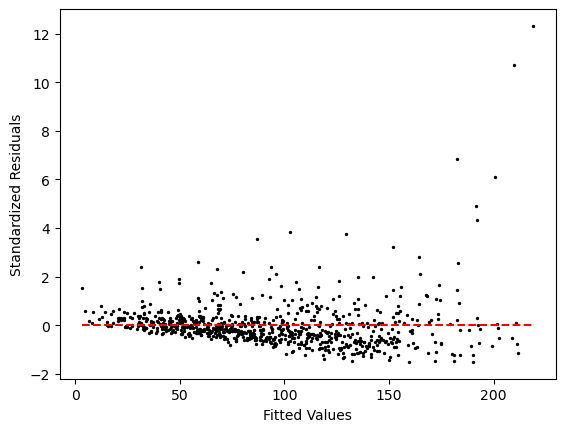

Mean of Residuals: -1.197309480814994e-12


In [7]:
### Residual vs Fitted value - check for patterns and distribution of points around 0 on the y-axis


%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

#Residuals calculated by definition above.
predicted_y = reg.predict(train_X)
#Note we can perform element-wise subtraction between arrays like so
residuals = train_y - predicted_y

# First we create an array of normalized residuals using a Scikit function
scaler = StandardScaler().fit(residuals.reshape(-1,1))
norm_residuals = scaler.transform(residuals.reshape(-1,1))

# Plot and take the root and absolute values of the norms
plt.scatter(reg.predict(train_X),norm_residuals,c='black',s=2)

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.show()

print('Mean of Residuals:',residuals.mean())


In [8]:
# the Residual vs Fitted values graph is cone-shaped
# the Mean of Residuals: -1.197309480814994e-12

## You can see here that as the predicted value of Y increases, the variance of the residual also increases. 
## By producing a ‘residuals by regressor’ plot by you can gain more insight into where the heteroskedasticity originates.

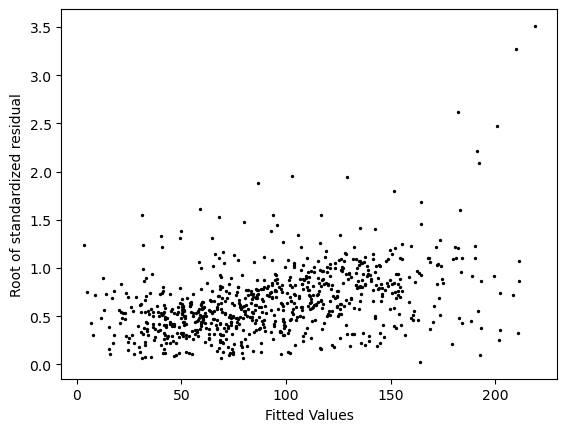

In [9]:
### Scale-location plot - check for assumptions of homoscedasticity

# this is cone shaped:  this implies that there is heteroskedasticity 

from sklearn.preprocessing import StandardScaler

# First we create an array of normalized residuals using a Scikit function
scaler = StandardScaler().fit(residuals.reshape(-1,1))
norm_residuals = scaler.transform(residuals.reshape(-1,1))

# Plot and take the root and absolute values of the norms
plt.scatter(predicted_y,np.sqrt(np.abs(norm_residuals)),c='black',s=2)
plt.xlabel("Fitted Values")
plt.ylabel("Root of standardized residual")
plt.show()

In [10]:
# Breuch-Pagan Test for heteroskedasticity 

from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan

#Perform the Breuch-Pagan Test by running this line
bp = het_breuschpagan(tot_crime_model.resid,tot_crime_model.model.exog)
measures = ('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value')
print(dict(zip(measures,bp)))

{'LM Statistic': 41.263364866895074, 'LM-Test p-value': 2.5695193769909194e-07, 'F-Statistic': 7.1919402129595555, 'F-Test p-value': 1.748061268475209e-07}


In [11]:
# The results of the Breusch-Pagan test will be a tuple of 4 values. 
# The ones we are concerned about are the p-values. 

# 'LM-Test p-value': 2.5695193769909194e-07
# 'F-Test p-value': 1.748061268475209e-07

# They are both less than 0.05, the model is found to be heteroskedastic.

In [12]:
# Applying HCCME o correct the inteference in the regression 
# Used HC2 when data has greater than 250 observations.

corrected_model = tot_crime_model.get_robustcov_results(cov_type = 'HC2')
print(corrected_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Crime   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     36.26
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           7.64e-39
Time:                        22:32:03   Log-Likelihood:                -4422.9
No. Observations:                 790   AIC:                             8860.
Df Residuals:                     783   BIC:                             8892.
Df Model:                           6                                         
Covariance Type:                  HC2                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [13]:
# This produces heteroskedasticity-consistent inferences and tests in the same way a regular regression does. 
# It will also use the corrected covariance matrix for any test statements used on the model.


# R-squqared: 0.311
# P value for F-test: 7.64e-39 - model is siginificant
# p value for T test:

# OCC_YEAR: 0.000
# Total_Age_groups_of_the_population: 0.000     
# Married_CommonLaw_Rate:  0.000  
# Education_Rate: 0.019
# Employment Rate: 0.052 
# Average_total_income_in_2020: 0.000

# from the correct model after fixing heteroskedasticity, employment rate should be removed

In [14]:
tot_crime_model_v1 = ols('Number_Of_Crime ~ OCC_YEAR + Total_Age_groups_of_the_population + Married_CommonLaw_Rate + Education_Rate + Average_total_income_in_2020',data).fit()
corrected_model_v1 = tot_crime_model_v1.get_robustcov_results(cov_type = 'HC2')
print(corrected_model_v1.summary())

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Crime   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     36.98
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           4.48e-34
Time:                        22:32:03   Log-Likelihood:                -4424.9
No. Observations:                 790   AIC:                             8862.
Df Residuals:                     784   BIC:                             8890.
Df Model:                           5                                         
Covariance Type:                  HC2                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

# Final model after fixing heteroskedasticity

In [15]:
tot_crime_model_v2 = ols('Number_Of_Crime ~ OCC_YEAR + Total_Age_groups_of_the_population + Married_CommonLaw_Rate + \
Average_total_income_in_2020',data).fit()
corrected_model_v2 = tot_crime_model_v2.get_robustcov_results(cov_type = 'HC2')
print(corrected_model_v2.summary())

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Crime   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     45.25
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           3.22e-34
Time:                        22:32:03   Log-Likelihood:                -4426.8
No. Observations:                 790   AIC:                             8864.
Df Residuals:                     785   BIC:                             8887.
Df Model:                           4                                         
Covariance Type:                  HC2                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [16]:
# R-squqared: 0.304
# P value for F-test: 3.22e-34 - model is siginificant
# p value for T test:

# OCC_YEAR: 0.000
# Total_Age_groups_of_the_population: 0.000     
# Married_CommonLaw_Rate:  0.000  
# Average_total_income_in_2020: 0.000

# from the correct model after fixing heteroskedasticity, employment and education rate have been removed

In [17]:
#Import the required package from sklearn
from sklearn.linear_model import LinearRegression

new_train_X = data[['OCC_YEAR','Total_Age_groups_of_the_population','Married_CommonLaw_Rate','Average_total_income_in_2020']].values
new_train_y = data['Number_Of_Crime'].values


# Fitting data to a regression model requires 

new_reg = LinearRegression().fit(new_train_X, new_train_y)

# Residual vs Fitted

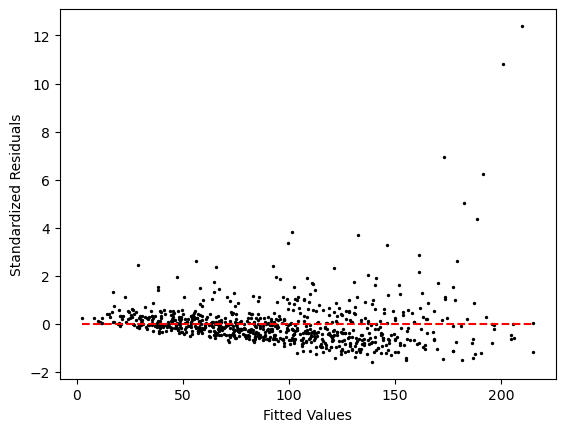

Mean of Residuals: -4.466885370732863e-13


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

#Residuals calculated by definition above.
new_predicted_y = new_reg.predict(new_train_X)
#Note we can perform element-wise subtraction between arrays like so
new_residuals = new_train_y - new_predicted_y

# First we create an array of normalized residuals using a Scikit function
new_scaler = StandardScaler().fit(new_residuals.reshape(-1,1))
new_norm_residuals = new_scaler.transform(new_residuals.reshape(-1,1))

# Plot and take the root and absolute values of the norms
plt.scatter(new_reg.predict(new_train_X),new_norm_residuals,c='black',s=2)

#This line adds the dashed horizontal line
plt.hlines(0,min(new_predicted_y),max(new_predicted_y),color='red',linestyles='dashed')
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.show()

print('Mean of Residuals:',new_residuals.mean())

# Normal QQ plot

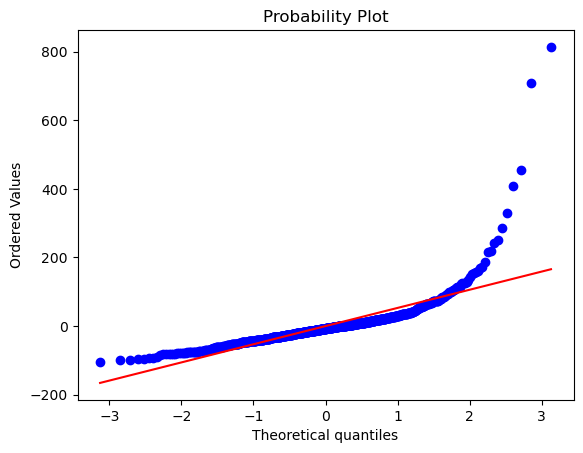

In [19]:
import scipy.stats as stats

'''
Boilerplate code for creating a Normal Q-Q plot. The first two lines declare 
a figure and a subplot. This is an alternate way to output plots which allows 
for more than one plot per output.
'''
fig = plt.figure()
ax = fig.add_subplot(111)

'''
Scipy.Stats has a built-in function for generating this type of plot. This 
function takes three arguments: the measurement being checked (residuals), 
the distribution we are checking against (normal in this case), and the plot 
to plot it to.
'''
stats.probplot(new_residuals,dist='norm',plot=ax)
plt.show()

# Influence plot

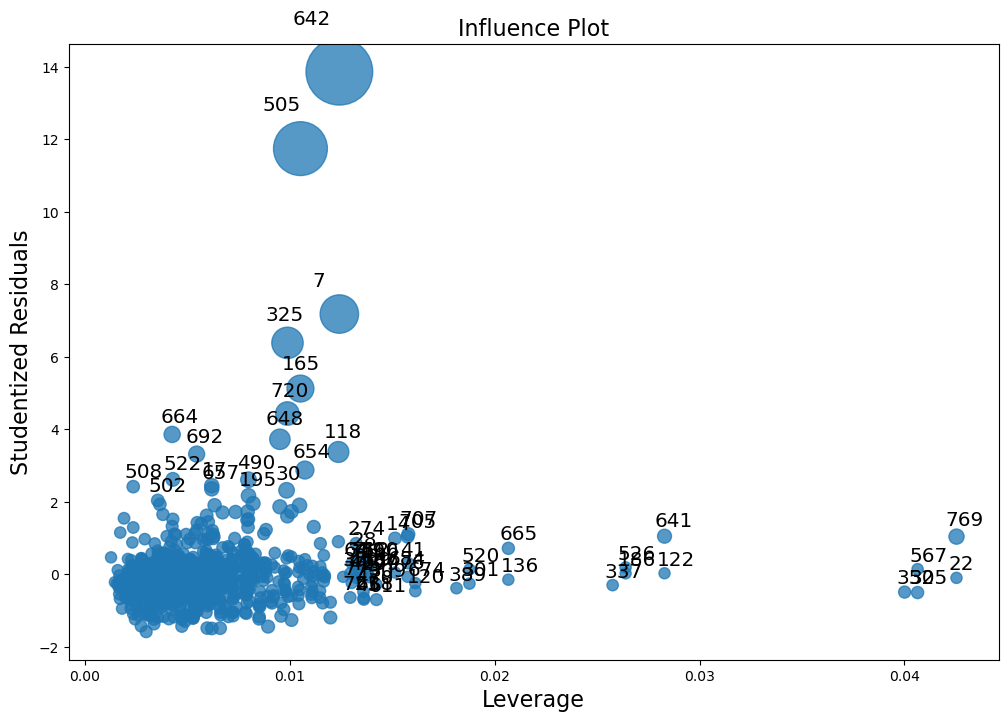

In [20]:
#In a similar fashion to how the QQ plot was built, this plot can be generated.
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(tot_crime_model_v2, ax=ax, criterion="cooks")
plt.show()

# Density plot

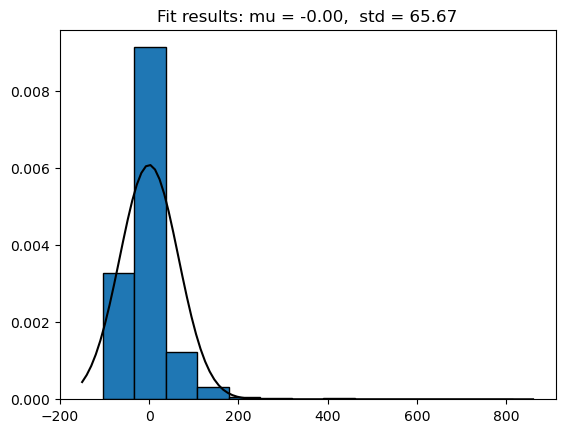

In [21]:
# density plot - to check for normality of errors

# this shows that there is normality issues as plot is not a normal distribution

from scipy.stats import norm

# Fit a normal distribution to the data:
mean, std = norm.fit(new_residuals)

# Plot the histogram.
plt.hist(new_residuals, bins=13, edgecolor='black', density=True)

# Generate a PDF based on the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color='black')
title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()

# Prediction number for crimes

In [22]:
#train_X = data[['OCC_YEAR', Total_Age_groups_of_the_population', 'Married_CommonLaw_Rate', 'Education_Rate', 
#'Employment_rate', 'Average_age', 'Average_total_income_in_2020']].values
#train_y = data['Number_Of_Crime'].values
#reg = LinearRegression().fit(train_X, train_y)

# USE AVERAGE of each column
from statistics import mean
new_reg.predict(np.array([2024, mean(data['Total_Age_groups_of_the_population']), mean(data['Education_Rate']), \
                          mean(data['Average_total_income_in_2020'])]).reshape(1,-1))[0]

140.0818911507049

# Log transformation

In [23]:
#Applying log transformation to the data

data['avg_income_log_data'] = np.log(data['Average_total_income_in_2020'])
data['tot_population_log_data'] = np.log(data['Total_Age_groups_of_the_population'])
data

,Number_Of_Crime,OCC_YEAR,Neighbourhood_Name,Neighbourhood_Number,Total_Age_groups_of_the_population,Married_CommonLaw_Rate,Education_Rate,Employment_rate,Average_age,Average_total_income_in_2020,avg_income_log_data,tot_population_log_data
0,218,2019,Milliken,130,23980,48.519600,20.454545,41.5,44.9,36800,10.513253,10.084975
1,100,2019,Woburn North,142,26580,44.018059,29.063205,50.5,40.1,40000,10.596635,10.187914
2,69,2019,Forest Hill North,102,12290,44.995932,44.304312,60.5,42.3,89700,11.404226,9.416541
3,168,2019,Oakdale-Beverley Heights,154,21420,38.608777,12.675070,50.8,39.8,41160,10.625222,9.972080
4,79,2019,Rockcliffe-Smythe,111,22235,40.746571,15.988307,48.8,42.2,43840,10.688302,10.009423
...,...,...,...,...,...,...,...,...,...,...,...,...
785,49,2023,North Toronto,173,15885,42.052251,54.548316,65.0,39.2,58100,10.969921,9.673131
786,38,2023,Broadview North,57,10955,41.853035,32.496577,56.1,42.6,54050,10.897665,9.301551
787,37,2023,Old East York,58,9160,47.379913,31.168122,56.3,43.0,63800,11.063508,9.122601
788,63,2023,South Eglinton-Davisville,174,22735,44.336925,58.324170,65.6,40.1,69000,11.141862,10.031661


In [24]:
log_model = ols('Number_Of_Crime ~ OCC_YEAR + tot_population_log_data + Married_CommonLaw_Rate + Education_Rate + Employment_rate + Average_age + avg_income_log_data',data).fit()
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Crime   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     41.34
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           1.22e-49
Time:                        22:32:05   Log-Likelihood:                -4445.8
No. Observations:                 790   AIC:                             8908.
Df Residuals:                     782   BIC:                             8945.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1

In [25]:
log_train_X = data[['OCC_YEAR', 'tot_population_log_data', 'Married_CommonLaw_Rate', 'Education_Rate', 'Employment_rate', 'Average_age', 'avg_income_log_data']].values
log_train_y = data['Number_Of_Crime'].values


# Fitting data to a regression model requires 

log_reg = LinearRegression().fit(log_train_X, log_train_y)

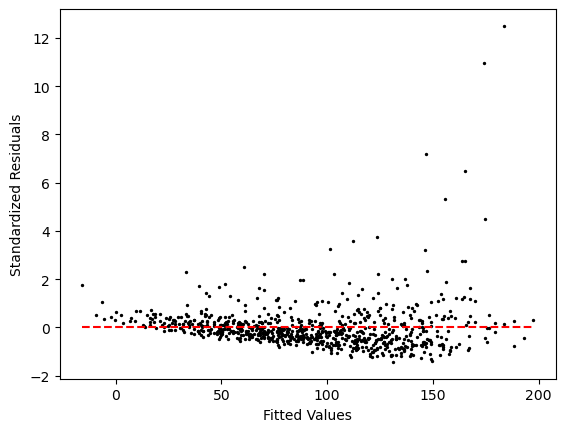

Mean of Residuals: -1.197309480814994e-12


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

#Residuals calculated by definition above.
log_predicted_y = log_reg.predict(log_train_X)
#Note we can perform element-wise subtraction between arrays like so
log_residuals = log_train_y - log_predicted_y

# First we create an array of normalized residuals using a Scikit function
log_scaler = StandardScaler().fit(log_residuals.reshape(-1,1))
log_norm_residuals = log_scaler.transform(log_residuals.reshape(-1,1))

# Plot and take the root and absolute values of the norms
plt.scatter(log_reg.predict(log_train_X),log_norm_residuals,c='black',s=2)

#This line adds the dashed horizontal line
plt.hlines(0,min(log_predicted_y),max(log_predicted_y),color='red',linestyles='dashed')
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.show()

print('Mean of Residuals:',residuals.mean())


In [27]:
data['avg_income_log_data_2'] = np.log(data['avg_income_log_data'])
data['tot_population_log_data_2'] = np.log(data['tot_population_log_data'])
data

,Number_Of_Crime,OCC_YEAR,Neighbourhood_Name,Neighbourhood_Number,Total_Age_groups_of_the_population,Married_CommonLaw_Rate,Education_Rate,Employment_rate,Average_age,Average_total_income_in_2020,avg_income_log_data,tot_population_log_data,avg_income_log_data_2,tot_population_log_data_2
0,218,2019,Milliken,130,23980,48.519600,20.454545,41.5,44.9,36800,10.513253,10.084975,2.352637,2.311047
1,100,2019,Woburn North,142,26580,44.018059,29.063205,50.5,40.1,40000,10.596635,10.187914,2.360536,2.321202
2,69,2019,Forest Hill North,102,12290,44.995932,44.304312,60.5,42.3,89700,11.404226,9.416541,2.433984,2.242468
3,168,2019,Oakdale-Beverley Heights,154,21420,38.608777,12.675070,50.8,39.8,41160,10.625222,9.972080,2.363231,2.299789
4,79,2019,Rockcliffe-Smythe,111,22235,40.746571,15.988307,48.8,42.2,43840,10.688302,10.009423,2.369150,2.303527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,49,2023,North Toronto,173,15885,42.052251,54.548316,65.0,39.2,58100,10.969921,9.673131,2.395157,2.269352
786,38,2023,Broadview North,57,10955,41.853035,32.496577,56.1,42.6,54050,10.897665,9.301551,2.388549,2.230181
787,37,2023,Old East York,58,9160,47.379913,31.168122,56.3,43.0,63800,11.063508,9.122601,2.403652,2.210755
788,63,2023,South Eglinton-Davisville,174,22735,44.336925,58.324170,65.6,40.1,69000,11.141862,10.031661,2.410709,2.305746


In [28]:
log_model = ols('Number_Of_Crime ~ OCC_YEAR + tot_population_log_data_2 + Married_CommonLaw_Rate + Education_Rate + Employment_rate + Average_age + avg_income_log_data_2',data).fit()
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Crime   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     40.25
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           1.91e-48
Time:                        22:32:05   Log-Likelihood:                -4448.6
No. Observations:                 790   AIC:                             8913.
Df Residuals:                     782   BIC:                             8951.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [29]:
log_train_X_2 = data[['OCC_YEAR','tot_population_log_data_2', 'Married_CommonLaw_Rate', 'Education_Rate', 'Employment_rate', 'Average_age', 'avg_income_log_data_2']].values
log_train_y_2 = data['Number_Of_Crime'].values


# Fitting data to a regression model requires 

log_reg_2 = LinearRegression().fit(log_train_X_2, log_train_y_2)

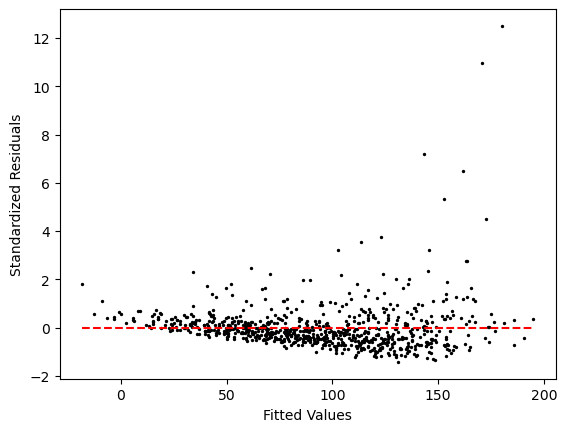

Mean of Residuals: -1.197309480814994e-12


In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

#Residuals calculated by definition above.
log_predicted_y_2 = log_reg_2.predict(log_train_X_2)
#Note we can perform element-wise subtraction between arrays like so
log_residuals_2 = log_train_y_2 - log_predicted_y_2

# First we create an array of normalized residuals using a Scikit function
log_scaler_2 = StandardScaler().fit(log_residuals_2.reshape(-1,1))
log_norm_residuals_2 = log_scaler_2.transform(log_residuals_2.reshape(-1,1))

# Plot and take the root and absolute values of the norms
plt.scatter(log_reg_2.predict(log_train_X_2),log_norm_residuals_2,c='black',s=2)

#This line adds the dashed horizontal line
plt.hlines(0,min(log_predicted_y_2),max(log_predicted_y_2),color='red',linestyles='dashed')
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.show()

print('Mean of Residuals:',residuals.mean())

# Square root transformation

In [31]:

#Applying square root transformation to the data

data['avg_income_sqrt_data'] = np.sqrt(data['Average_total_income_in_2020'])
data['tot_population_sqrt_data'] = np.sqrt(data['Total_Age_groups_of_the_population'])

In [32]:
sqrt_model = ols('Number_Of_Crime ~ OCC_YEAR + tot_population_sqrt_data + Married_CommonLaw_Rate + Education_Rate + Employment_rate + Average_age + avg_income_sqrt_data',data).fit()
print(sqrt_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Number_Of_Crime   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     46.45
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           3.95e-55
Time:                        22:32:06   Log-Likelihood:                -4432.8
No. Observations:                 790   AIC:                             8882.
Df Residuals:                     782   BIC:                             8919.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [33]:
sqrt_train_X = data[['OCC_YEAR', 'tot_population_sqrt_data', 'Married_CommonLaw_Rate', 'Education_Rate', 'Employment_rate', 'Average_age', 'avg_income_sqrt_data']].values
sqrt_train_y = data['Number_Of_Crime'].values


# Fitting data to a regression model requires 

sqrt_reg = LinearRegression().fit(sqrt_train_X, sqrt_train_y)

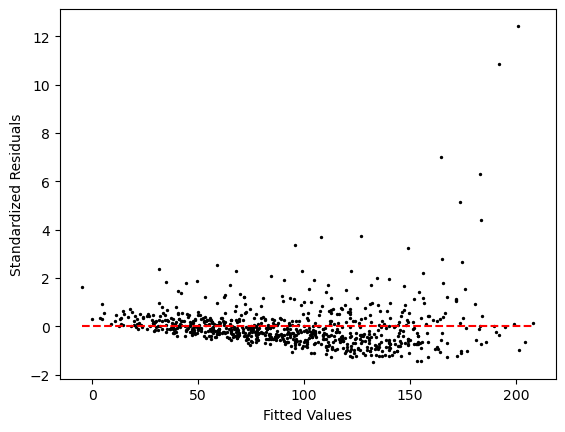

Mean of Residuals: -1.197309480814994e-12


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

#Residuals calculated by definition above.
sqrt_predicted_y = sqrt_reg.predict(sqrt_train_X)
#Note we can perform element-wise subtraction between arrays like so
sqrt_residuals = sqrt_train_y - sqrt_predicted_y

# First we create an array of normalized residuals using a Scikit function
sqrt_scaler = StandardScaler().fit(sqrt_residuals.reshape(-1,1))
sqrt_norm_residuals = sqrt_scaler.transform(sqrt_residuals.reshape(-1,1))

# Plot and take the root and absolute values of the norms
plt.scatter(sqrt_reg.predict(sqrt_train_X),sqrt_norm_residuals,c='black',s=2)

#This line adds the dashed horizontal line
plt.hlines(0,min(sqrt_predicted_y),max(sqrt_predicted_y),color='red',linestyles='dashed')
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.show()

print('Mean of Residuals:',residuals.mean())
